In [1]:
# module imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
from matplotlib.patches import Patch


# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, precision_recall_fscore_support

print('Welcome!')

Welcome!


In [2]:
# fetch the training file
file_path_full_training_set = 'KDDTrain+.txt'
file_path_test = 'KDDTest+.txt' 

df = pd.read_csv(file_path_full_training_set)
test_df = pd.read_csv(file_path_test)

In [3]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns
test_df.columns = columns

# sanity check
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
# map normal to 0, all attacks to 1
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

#data_with_attack = df.join(is_attack, rsuffix='_flag')
df['attack_flag'] = is_attack
test_df['attack_flag'] = test_attack

# view the result
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1


In [5]:
np.shape(df)

(125972, 44)

In [6]:
set(df['protocol_type'])

{'icmp', 'tcp', 'udp'}

In [7]:
set(df['attack'])

{'back',
 'buffer_overflow',
 'ftp_write',
 'guess_passwd',
 'imap',
 'ipsweep',
 'land',
 'loadmodule',
 'multihop',
 'neptune',
 'nmap',
 'normal',
 'perl',
 'phf',
 'pod',
 'portsweep',
 'rootkit',
 'satan',
 'smurf',
 'spy',
 'teardrop',
 'warezclient',
 'warezmaster'}

In [8]:
set(df['service'])

{'IRC',
 'X11',
 'Z39_50',
 'aol',
 'auth',
 'bgp',
 'courier',
 'csnet_ns',
 'ctf',
 'daytime',
 'discard',
 'domain',
 'domain_u',
 'echo',
 'eco_i',
 'ecr_i',
 'efs',
 'exec',
 'finger',
 'ftp',
 'ftp_data',
 'gopher',
 'harvest',
 'hostnames',
 'http',
 'http_2784',
 'http_443',
 'http_8001',
 'imap4',
 'iso_tsap',
 'klogin',
 'kshell',
 'ldap',
 'link',
 'login',
 'mtp',
 'name',
 'netbios_dgm',
 'netbios_ns',
 'netbios_ssn',
 'netstat',
 'nnsp',
 'nntp',
 'ntp_u',
 'other',
 'pm_dump',
 'pop_2',
 'pop_3',
 'printer',
 'private',
 'red_i',
 'remote_job',
 'rje',
 'shell',
 'smtp',
 'sql_net',
 'ssh',
 'sunrpc',
 'supdup',
 'systat',
 'telnet',
 'tftp_u',
 'tim_i',
 'time',
 'urh_i',
 'urp_i',
 'uucp',
 'uucp_path',
 'vmnet',
 'whois'}

In [9]:
# lists to hold our attack classifications
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

# we will use these for plotting below
attack_labels = ['Normal','DoS','Probe','Privilege','Access']

# helper function to pass to data frame mapping
def map_attack(attack):
    if attack in dos_attacks:
        # dos_attacks map to 1
        attack_type = 1
    elif attack in probe_attacks:
        # probe_attacks mapt to 2
        attack_type = 2
    elif attack in privilege_attacks:
        # privilege escalation attacks map to 3
        attack_type = 3
    elif attack in access_attacks:
        # remote access attacks map to 4
        attack_type = 4
    else:
        # normal maps to 0
        attack_type = 0
        
    return attack_type

# map the data and join to the data set
attack_map = df.attack.apply(map_attack)
df['attack_map'] = attack_map

test_attack_map = test_df.attack.apply(map_attack)
test_df['attack_map'] = test_attack_map

# view the result
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1,1


In [10]:
columns_to_keep = ['protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','num_failed_logins','num_compromised','root_shell','is_guest_login'
,'count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate'
,'dst_host_srv_rerror_rate','attack_flag','attack_map']
Attribute_Set_1_train =  df[columns_to_keep]
Attribute_Set_1_test = test_df[columns_to_keep]
Attribute_Set_1_test.head()


,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,num_failed_logins,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_flag,attack_map
0,tcp,private,REJ,0,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1,1
1,tcp,ftp_data,SF,12983,0,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0,0
2,icmp,eco_i,SF,20,0,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1,2
3,tcp,telnet,RSTO,0,15,0,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1,2
4,tcp,http,SF,267,14515,0,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,0,0


In [11]:
set(df['attack_map'])

{0, 1, 2, 3, 4}

In [12]:
# get the intial set of encoded features and encode them
features_to_encode = ['protocol_type', 'service', 'flag']
encoded = pd.get_dummies(Attribute_Set_1_train[features_to_encode])
test_encoded_base = pd.get_dummies(Attribute_Set_1_test[features_to_encode])

# not all of the features are in the test set, so we need to account for diffs
test_index = np.arange(len(Attribute_Set_1_test.index))
column_diffs = list(set(encoded.columns.values)-set(test_encoded_base.columns.values))

diff_df = pd.DataFrame(0, index=test_index, columns=column_diffs)

# we'll also need to reorder the columns to match, so let's get those
column_order = encoded.columns.to_list()

# append the new columns
test_encoded_temp = test_encoded_base.join(diff_df)

# reorder the columns
test_final = test_encoded_temp[column_order].fillna(0)

# get numeric features, we won't worry about encoding these at this point
numeric_features = ['src_bytes', 'dst_bytes']

# model to fit/test
to_fit = encoded.join(Attribute_Set_1_train[numeric_features])
test_set = test_final.join(Attribute_Set_1_test[numeric_features])

In [13]:
to_fit.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,src_bytes,dst_bytes
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,146,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,232,8153
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,199,420
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
test_set.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,src_bytes,dst_bytes
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,12983,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,20,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,267,14515


In [15]:
# create our target classifications
binary_y = Attribute_Set_1_train['attack_flag']
multi_y = Attribute_Set_1_train['attack_map']

test_binary_y = Attribute_Set_1_test['attack_flag']
test_multi_y = Attribute_Set_1_test['attack_map']

# build the training sets
binary_train_X, binary_val_X, binary_train_y, binary_val_y = train_test_split(to_fit, binary_y, test_size=0.6)
multi_train_X, multi_val_X, multi_train_y, multi_val_y = train_test_split(to_fit, multi_y, test_size = 0.6)

In [16]:
binary_train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50388 entries, 41570 to 108470
Data columns (total 86 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   protocol_type_icmp   50388 non-null  uint8
 1   protocol_type_tcp    50388 non-null  uint8
 2   protocol_type_udp    50388 non-null  uint8
 3   service_IRC          50388 non-null  uint8
 4   service_X11          50388 non-null  uint8
 5   service_Z39_50       50388 non-null  uint8
 6   service_aol          50388 non-null  uint8
 7   service_auth         50388 non-null  uint8
 8   service_bgp          50388 non-null  uint8
 9   service_courier      50388 non-null  uint8
 10  service_csnet_ns     50388 non-null  uint8
 11  service_ctf          50388 non-null  uint8
 12  service_daytime      50388 non-null  uint8
 13  service_discard      50388 non-null  uint8
 14  service_domain       50388 non-null  uint8
 15  service_domain_u     50388 non-null  uint8
 16  service_echo     

In [17]:
binary_train_X.sample(5)

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,src_bytes,dst_bytes
85748,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,184,1572
64788,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,43,68
28791,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
53668,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
122358,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Initialize the Random Forest Classifier              SVM, , NB, and DT
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
RF_model.fit(multi_train_X, multi_train_y)

# Make predictions on the test set
RF_y_pred = RF_model.predict(multi_val_X)

# Generate the classification report
RF_report = classification_report(multi_val_y, RF_y_pred)

# Print the classification report
print(RF_report)

# Evaluate the model
RF_accuracy = accuracy_score(multi_val_y, RF_y_pred)
RF_precision = precision_score(multi_val_y, RF_y_pred, average=None)
RF_recall = recall_score(multi_val_y, RF_y_pred, average=None)
RF_f1 = f1_score(multi_val_y, RF_y_pred, average=None)

# Print evaluation metrics
print("RF_Accuracy:", RF_accuracy)
print("RF_Precision:", RF_precision)
print("RF_Recall:", RF_recall)
print("RF_F1 Score:", RF_f1)




              precision    recall  f1-score   support

           0       0.99      0.99      0.99     40407
           1       0.95      0.99      0.97     27611
           2       0.98      0.81      0.89      6932
           3       0.34      0.50      0.41        24
           4       0.99      0.95      0.97       610

    accuracy                           0.98     75584
   macro avg       0.85      0.85      0.85     75584
weighted avg       0.98      0.98      0.98     75584

RF_Accuracy: 0.9760795935647756
RF_Precision: [0.99493457 0.9486843  0.98447855 0.34285714 0.98972603]
RF_Recall: [0.99163511 0.99496577 0.8143393  0.5        0.94754098]
RF_F1 Score: [0.9932821  0.97127402 0.8913627  0.40677966 0.9681742 ]


In [19]:
# Initialize the Logistic Regression model
LR_model = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=250)

# Train the model
LR_model.fit(multi_train_X, multi_train_y)

# Make predictions on the test set
LR_y_pred = LR_model.predict(multi_val_X)

# Generate the classification report
LR_report = classification_report(multi_val_y, LR_y_pred)

# Print the classification report
print(LR_report)

# Evaluate the model
LR_accuracy = accuracy_score(multi_val_y, LR_y_pred)
LR_precision = precision_score(multi_val_y, LR_y_pred, average=None)
LR_recall = recall_score(multi_val_y, LR_y_pred, average=None)
LR_f1 = f1_score(multi_val_y, LR_y_pred, average=None)

# Print evaluation metrics
print("LR_Accuracy:", LR_accuracy)
print("LR_Precision:", LR_precision)
print("LR_Recall:", LR_recall)
print("LR_F1 Score:", LR_f1)

              precision    recall  f1-score   support

           0       0.76      0.97      0.86     40407
           1       0.95      0.77      0.85     27611
           2       0.00      0.00      0.00      6932
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00       610

    accuracy                           0.80     75584
   macro avg       0.34      0.35      0.34     75584
weighted avg       0.76      0.80      0.77     75584

LR_Accuracy: 0.8021935859441152
LR_Precision: [0.76453058 0.94924061 0.00405562 0.         0.        ]
LR_Recall: [0.9713911  0.77414798 0.00100981 0.         0.        ]
LR_F1 Score: [0.85563561 0.85279978 0.001617   0.         0.        ]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metr

In [20]:
# Initialize the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
svm_model.fit(multi_train_X, multi_train_y)

# Make predictions on the test set
svm_y_pred = svm_model.predict(multi_val_X)

# Generate the classification report
svm_report = classification_report(multi_val_y, LR_y_pred)

# Print the classification report
print(svm_report)

# Evaluate the model
svm_accuracy = accuracy_score(multi_val_y, LR_y_pred)
svm_precision = precision_score(multi_val_y, LR_y_pred, average=None)
svm_recall = recall_score(multi_val_y, LR_y_pred, average=None)
svm_f1 = f1_score(multi_val_y, LR_y_pred, average=None)

# Print evaluation metrics
print("LR_Accuracy:", svm_accuracy)
print("LR_Precision:", svm_precision)
print("LR_Recall:", svm_recall)
print("LR_F1 Score:", svm_f1)

              precision    recall  f1-score   support

           0       0.76      0.97      0.86     40407
           1       0.95      0.77      0.85     27611
           2       0.00      0.00      0.00      6932
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00       610

    accuracy                           0.80     75584
   macro avg       0.34      0.35      0.34     75584
weighted avg       0.76      0.80      0.77     75584

LR_Accuracy: 0.8021935859441152
LR_Precision: [0.76453058 0.94924061 0.00405562 0.         0.        ]
LR_Recall: [0.9713911  0.77414798 0.00100981 0.         0.        ]
LR_F1 Score: [0.85563561 0.85279978 0.001617   0.         0.        ]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metr

In [21]:
# Initialize the naive bayes model
NB_model = GaussianNB()

# Train the model
NB_model.fit(multi_train_X, multi_train_y)

# Make predictions on the test set
NB_y_pred = NB_model.predict(multi_val_X)

# Generate the classification report
NB_report = classification_report(multi_val_y, NB_y_pred)

# Print the classification report
print(NB_report)

# Evaluate the model
NB_accuracy = accuracy_score(multi_val_y, NB_y_pred)
NB_precision = precision_score(multi_val_y, NB_y_pred, average=None)
NB_recall = recall_score(multi_val_y, NB_y_pred, average=None)
NB_f1 = f1_score(multi_val_y, NB_y_pred, average=None)

# Print evaluation metrics
print("NB_Accuracy:", NB_accuracy)
print("NB_Precision:", NB_precision)
print("NB_Recall:", NB_recall)
print("NB_F1 Score:", NB_f1)


              precision    recall  f1-score   support

           0       0.91      0.14      0.25     40407
           1       0.39      0.98      0.56     27611
           2       0.08      0.00      0.00      6932
           3       0.00      0.00      0.00        24
           4       0.02      0.00      0.01       610

    accuracy                           0.43     75584
   macro avg       0.28      0.23      0.16     75584
weighted avg       0.64      0.43      0.34     75584

NB_Accuracy: 0.43357059695173583
NB_Precision: [0.90682935 0.39181024 0.07692308 0.         0.01538462]
NB_Recall: [1.41633875e-01 9.79319836e-01 7.21292556e-04 0.00000000e+00
 4.91803279e-03]
NB_F1 Score: [0.24500193 0.55969531 0.00142918 0.         0.00745342]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metr

In [22]:
# Initialize the KNN model
KNN_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
KNN_model.fit(multi_train_X, multi_train_y)

# Make predictions on the test set
KNN_y_pred = KNN_model.predict(multi_val_X)

# Generate the classification report
KNN_report = classification_report(multi_val_y, KNN_y_pred)

# Print the classification report
print(KNN_report)

# Evaluate the model
KNN_accuracy = accuracy_score(multi_val_y, KNN_y_pred)
KNN_precision = precision_score(multi_val_y, KNN_y_pred, average=None)
KNN_recall = recall_score(multi_val_y, KNN_y_pred, average=None)
KNN_f1 = f1_score(multi_val_y, KNN_y_pred, average=None)

# Print evaluation metrics
print("KNN_Accuracy:", KNN_accuracy)
print("KNN_Precision:", KNN_precision)
print("KNN_Recall:", KNN_recall)
print("KNN_F1 Score:", KNN_f1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     40407
           1       0.95      0.99      0.97     27611
           2       0.99      0.80      0.88      6932
           3       0.54      0.29      0.38        24
           4       0.97      0.95      0.96       610

    accuracy                           0.97     75584
   macro avg       0.89      0.80      0.84     75584
weighted avg       0.97      0.97      0.97     75584

KNN_Accuracy: 0.9743067315834039
KNN_Precision: [0.99286122 0.94648645 0.98579798 0.53846154 0.97301855]
KNN_Recall: [0.99128864 0.99416899 0.80106751 0.29166667 0.94590164]
KNN_F1 Score: [0.9920743  0.96974193 0.8838838  0.37837838 0.9592685 ]


In [23]:
# Initialize the Decision Tree model
DT_model = DecisionTreeClassifier(max_depth=7)

# Train the model
DT_model.fit(multi_train_X, multi_train_y)

# Make predictions on the test set
DT_y_pred = DT_model.predict(multi_val_X)

# Generate the classification report
DT_report = classification_report(multi_val_y, DT_y_pred)

# Print the classification report
print(DT_report)

# Evaluate the model
DT_accuracy = accuracy_score(multi_val_y, DT_y_pred)
DT_precision = precision_score(multi_val_y, DT_y_pred, average=None)
DT_recall = recall_score(multi_val_y, DT_y_pred, average=None)
DT_f1 = f1_score(multi_val_y, DT_y_pred, average=None)

# Print evaluation metrics
print("DT_Accuracy:", DT_accuracy)
print("DT_Precision:", DT_precision)
print("DT_Recall:", DT_recall)
print("DT_F1 Score:", DT_f1)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     40407
           1       0.93      0.99      0.96     27611
           2       0.98      0.77      0.86      6932
           3       0.00      0.00      0.00        24
           4       0.98      0.40      0.56       610

    accuracy                           0.97     75584
   macro avg       0.77      0.63      0.67     75584
weighted avg       0.97      0.97      0.96     75584

DT_Accuracy: 0.9651248941574937
DT_Precision: [0.98540885 0.93465832 0.97816113 0.         0.9757085 ]
DT_Recall: [0.9877744  0.99467603 0.76889786 0.         0.39508197]
DT_F1 Score: [0.9865902  0.96373366 0.86099669 0.         0.56242707]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metr

In [24]:
# Initialize the Extra Trees Classifier model
ETC_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the model
ETC_model.fit(multi_train_X, multi_train_y)

# Make predictions on the test set
ETC_y_pred = ETC_model.predict(multi_val_X)

# Generate the classification report
ETC_report = classification_report(multi_val_y, ETC_y_pred)

# Print the classification report
print(ETC_report)

# Evaluate the model
ETC_accuracy = accuracy_score(multi_val_y, ETC_y_pred)
ETC_precision = precision_score(multi_val_y, ETC_y_pred, average=None)
ETC_recall = recall_score(multi_val_y, ETC_y_pred, average=None)
ETC_f1 = f1_score(multi_val_y, ETC_y_pred, average=None)

# Print evaluation metrics
print("ETC_Accuracy:", ETC_accuracy)
print("ETC_Precision:", ETC_precision)
print("ETC_Recall:", ETC_recall)
print("ETC_F1 Score:", ETC_f1)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     40407
           1       0.95      0.99      0.97     27611
           2       0.98      0.81      0.89      6932
           3       0.33      0.54      0.41        24
           4       0.98      0.95      0.97       610

    accuracy                           0.98     75584
   macro avg       0.85      0.86      0.85     75584
weighted avg       0.98      0.98      0.98     75584

ETC_Accuracy: 0.9761060541913632
ETC_Precision: [0.99520604 0.94874983 0.98414082 0.33333333 0.97972973]
ETC_Recall: [0.99156087 0.99496577 0.81462781 0.54166667 0.95081967]
ETC_F1 Score: [0.99338011 0.97130836 0.891397   0.41269841 0.96505824]


In [25]:
# Initialize the MLPClassifier model
MLP_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, random_state=42)

# Train the model
MLP_model.fit(multi_train_X, multi_train_y)

# Make predictions on the test set
MLP_y_pred = MLP_model.predict(multi_val_X)

# Generate the classification report
MLP_report = classification_report(multi_val_y, MLP_y_pred)


print(MLP_report)

# Evaluate the model
MLP_accuracy = accuracy_score(multi_val_y, MLP_y_pred)
MLP_precision = precision_score(multi_val_y, MLP_y_pred, average=None)
MLP_recall = recall_score(multi_val_y, MLP_y_pred, average=None)
MLP_f1 = f1_score(multi_val_y, MLP_y_pred, average=None)
print(MLP_f1[1])

# Print evaluation metrics
print("MLP_Accuracy:", MLP_accuracy)
print("MLP_Precision:", MLP_precision)
print("MLP_Recall:", MLP_recall)
print("MLP_F1 Score:", MLP_f1)

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     40407
           1       0.93      0.99      0.96     27611
           2       0.82      0.77      0.80      6932
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00       610

    accuracy                           0.94     75584
   macro avg       0.54      0.54      0.54     75584
weighted avg       0.94      0.94      0.94     75584

0.959386518070816
MLP_Accuracy: 0.9391537891617273
MLP_Precision: [0.97495848 0.92660953 0.82220521 0.         0.        ]
MLP_Recall: [0.94426708 0.99456738 0.77452395 0.         0.        ]
MLP_F1 Score: [0.95936738 0.95938652 0.79765265 0.         0.        ]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metr

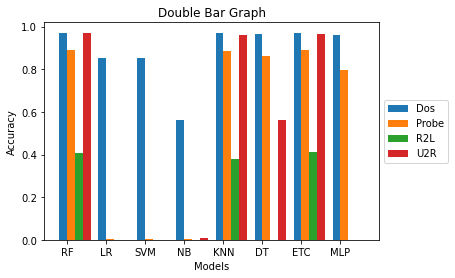

In [28]:
# Data for the first set of bars
models = ['RF', 'LR', 'SVM', 'NB', 'KNN','DT', 'ETC','MLP']
f1_set1 = [RF_f1[1], LR_f1[1], svm_f1[1], NB_f1[1],KNN_f1[1],DT_f1[1], ETC_f1[1], MLP_f1[1] ]

# Data for the second set of bars
f1_set2 = [RF_f1[2], LR_f1[2], svm_f1[2], NB_f1[2],KNN_f1[2],DT_f1[2], ETC_f1[2], MLP_f1[2] ]

# Data for the third set of bars
f1_set3 = [RF_f1[3], LR_f1[3], svm_f1[3], NB_f1[3],KNN_f1[3],DT_f1[3], ETC_f1[3], MLP_f1[3] ]

# Data for the fourth set of bars
f1_set4 = [RF_f1[4], LR_f1[4], svm_f1[4], NB_f1[4],KNN_f1[4],DT_f1[4], ETC_f1[4], MLP_f1[4] ]

# Set the width of each bar
bar_width = 0.20
# Positions for the bars on the x-axis
positions = np.arange(len(models))

# Plotting the first set of bars
plt.bar(positions, f1_set1, width=bar_width, label='Dos')

# Plotting the second set of bars
plt.bar(positions + bar_width, f1_set2, width=bar_width, label='Probe')


# Plotting the third set of bars
plt.bar(positions + bar_width*2, f1_set3, width=bar_width, label='R2L')


# Plotting the fourth set of bars
plt.bar(positions + bar_width*3, f1_set4, width=bar_width, label='U2R')

# Set the position of the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


# Customize the plot
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Double Bar Graph')
plt.xticks(positions + bar_width/2, models)

# Display the plot
plt.show()